In [379]:
import psycopg2
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense
import os
from torch.utils.data import Dataset, DataLoader,TensorDataset
import tensorflow as tf

In [380]:
connection = psycopg2.connect(
    user = "****",
    password = "***",
    host = "localhost",
    port = "5432",
    database = "postgres"
)

In [381]:
cursor = connection.cursor()
sql1 = ("select * from hasta_bilgi")
cursor.execute(sql1)
result1 = cursor.fetchall()
column_names1 = ["hasta_id","age","sex"]
df1 = pd.DataFrame(result1, columns = column_names1 )
df1.head()


,hasta_id,age,sex
0,1,63,1
1,2,37,1
2,3,41,0
3,4,56,1
4,5,57,0


In [382]:
sql2 = ("select * from kalp")
cursor.execute(sql2)
result2 = cursor.fetchall()
column_names2 = ["bilgi_id","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope",
                 "ca","thal","target","hasta_id"]
df2= pd.DataFrame(result2, columns = column_names2 )
df2.head()

,bilgi_id,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hasta_id
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,2,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,3,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,4,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,5,0,120,354,0,1,163,1,0.6,2,0,2,1,5


In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hasta_id  303 non-null    int64
 1   age       303 non-null    int64
 2   sex       303 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [384]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bilgi_id  303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
 13  hasta_id  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [385]:
df1.describe()

,hasta_id,age,sex
count,303.000000,303.000000,303.000000
mean,152.000000,54.366337,0.683168
std,87.612784,9.082101,0.466011
min,1.000000,29.000000,0.000000
25%,76.500000,47.500000,0.000000
50%,152.000000,55.000000,1.000000
75%,227.500000,61.000000,1.000000
max,303.000000,77.000000,1.000000


In [386]:
data_name = column_names2
data_name.pop(0)
data_name.pop()
data_name.pop()
scale_data = pd.DataFrame(df2.iloc[:, 1:12], columns = data_name)
target_data = pd.DataFrame(df2.iloc[:, 12], columns = ["target"])
scale_data.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,3,145,233,1,0,150,0,2.3,0,0,1
1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,130,204,0,0,172,0,1.4,2,0,2
3,1,120,236,0,1,178,0,0.8,2,0,2
4,0,120,354,0,1,163,1,0.6,2,0,2


In [387]:
data_name2 = column_names1
data_name2.pop(0)
data2 = pd.DataFrame(df1.iloc[:, 1:],
                     columns = data_name2)
data2.head()

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0


In [388]:
allData = pd.concat([data2,scale_data], axis=1)
allData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [389]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(allData))

StandardScaler()


In [390]:
DataScaled = scaler.fit_transform(allData)
DataScaled = pd.DataFrame(DataScaled, columns = list(allData.columns))


In [391]:
summary = DataScaled.describe()
summary.transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [392]:
"""correlationMatrix = DataScaled.corr()
figure, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlationMatrix, annot = True, linewidths = .5, ax=ax)
plt.show()"""

'correlationMatrix = DataScaled.corr()\nfigure, ax = plt.subplots(figsize = (15,15))\nsns.heatmap(correlationMatrix, annot = True, linewidths = .5, ax=ax)\nplt.show()'

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allData,target_data,test_size = 0.30, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = list(allData.columns))
X_test = pd.DataFrame(X_test, columns = list(allData.columns))

In [394]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [395]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)  
classifier.fit(X_train,np.ravel(y_train))

y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

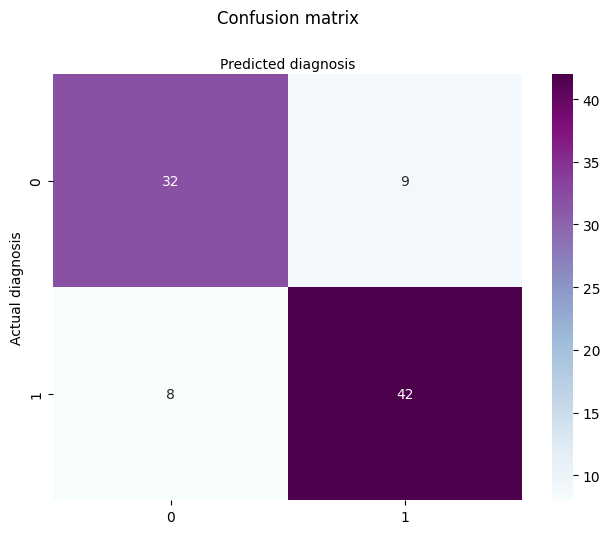

In [396]:
from sklearn import metrics
def conf_matrix(y_test, y_pred):
    matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Visualizing the Confusion Matrix
    class_names = [0,1] # Our diagnosis categories
    
    fig, ax = plt.subplots()
    # Setting up and visualizing the plot (do not worry about the code below!)
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="BuPu" ,fmt='g') # Creating heatmap
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y = 1.1)
    plt.ylabel('Actual diagnosis')
    plt.xlabel('Predicted diagnosis')

conf_matrix(y_test, y_pred)

In [397]:
def stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

stats(y_test, y_pred)

Accuracy:  0.8131868131868132
Precision:  0.8235294117647058
Recall:  0.84


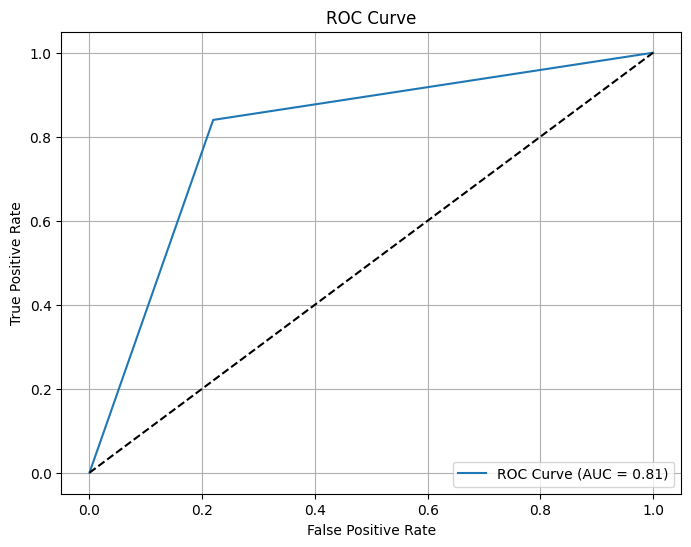

In [398]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC eğrisi için fpr, tpr ve eşik değerlerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC skorunu hesapla
auc_score = roc_auc_score(y_test, y_pred)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # rasgele tahminin ROC eğrisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 

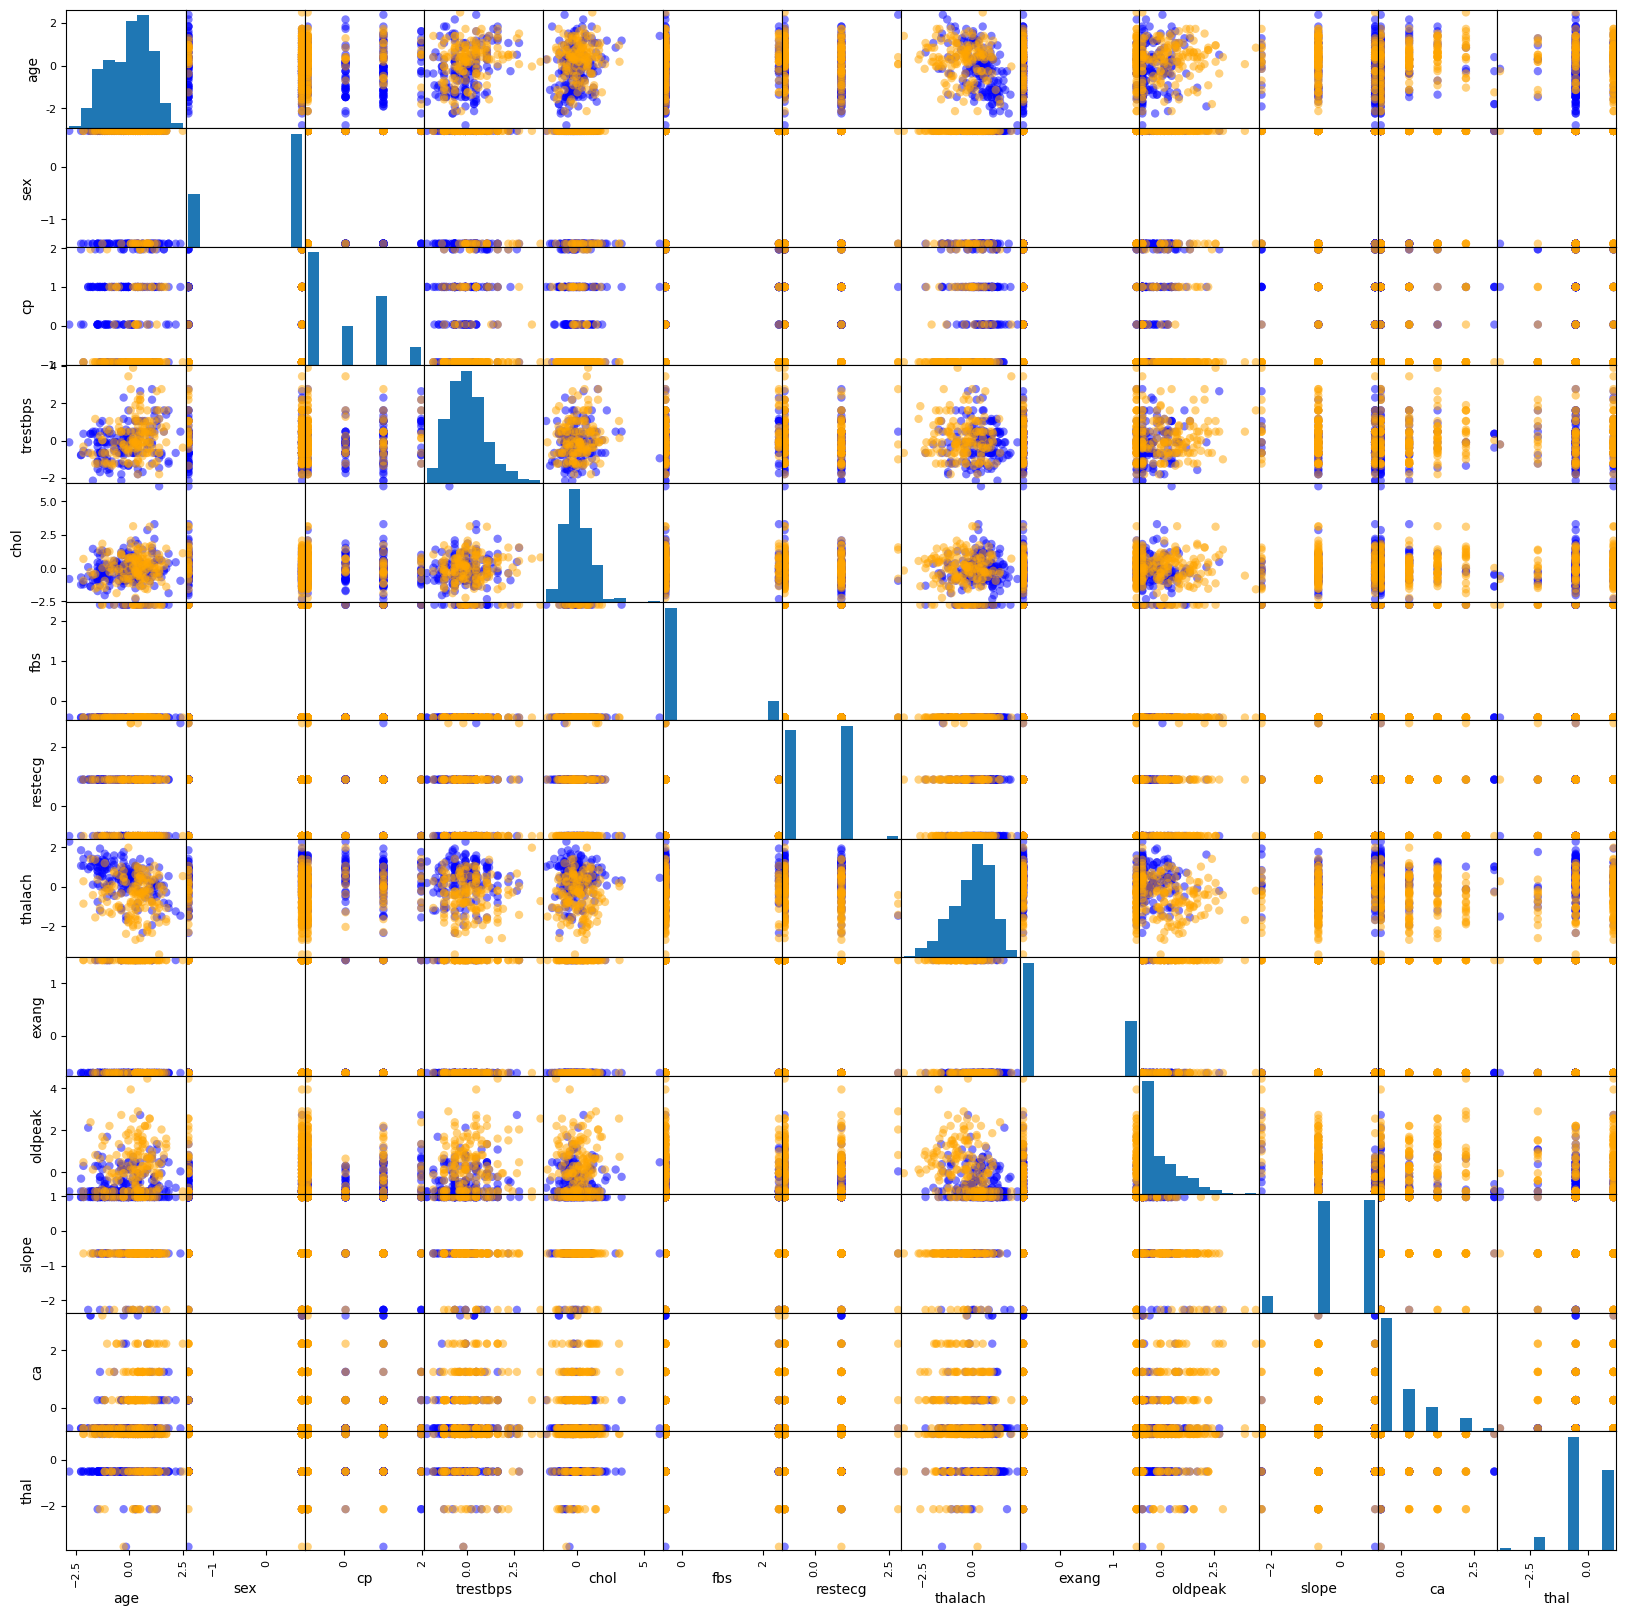

In [399]:
pred_colors = {0:'orange', 1:'blue'}
pd.plotting.scatter_matrix(DataScaled,figsize=(20,20),grid=True,
                           marker='o', c= target_data['target'].map(pred_colors))
plt.show()
 

Accuracy:  0.8241758241758241
Precision:  0.8269230769230769
Recall:  0.86


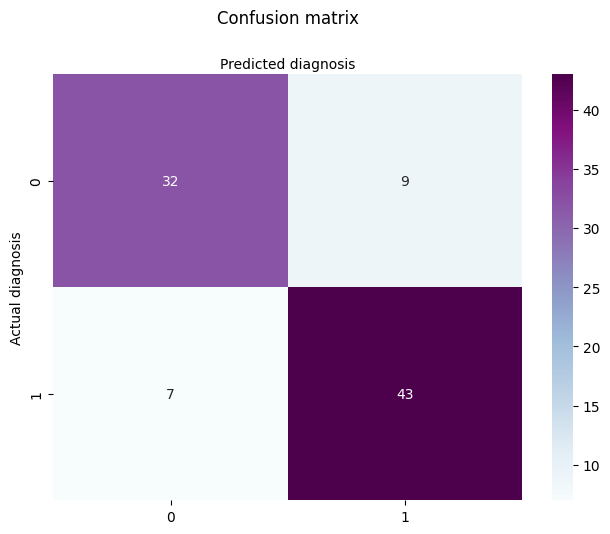

In [400]:
from sklearn.neighbors import KNeighborsClassifier

classifier_2 = KNeighborsClassifier(n_neighbors = 13)
classifier_2.fit(X_train,np.ravel(y_train))
pred_2 = classifier_2.predict(X_test)
conf_matrix(y_test, pred_2)
stats(y_test, pred_2)

Accuracy: 0.82418
Estimator: 10
Accuracy: 0.85714
Estimator: 12
Accuracy: 0.85714
Estimator: 14
Accuracy: 0.85714
Estimator: 16
Accuracy: 0.82418
Estimator: 18
Accuracy: 0.83516
Estimator: 20
Accuracy: 0.85714
Estimator: 22
Accuracy: 0.84615
Estimator: 24
Accuracy: 0.84615
Estimator: 26
Accuracy: 0.84615
Estimator: 28
Accuracy: 0.84615
Estimator: 30
Accuracy: 0.84615
Estimator: 32
Accuracy: 0.83516
Estimator: 34
Accuracy: 0.84615
Estimator: 36
Accuracy: 0.83516
Estimator: 38
Accuracy: 0.83516
Estimator: 40
Accuracy: 0.84615
Estimator: 42
Accuracy: 0.84615
Estimator: 44
Accuracy: 0.84615
Estimator: 46
Accuracy: 0.83516
Estimator: 48
Accuracy: 0.83516
Estimator: 50
Accuracy: 0.82418
Estimator: 52
Accuracy: 0.82418
Estimator: 54
Accuracy: 0.82418
Estimator: 56
Accuracy: 0.82418
Estimator: 58
Accuracy: 0.83516
Estimator: 60
Accuracy: 0.83516
Estimator: 62
Accuracy: 0.83516
Estimator: 64
Accuracy: 0.83516
Estimator: 66
Accuracy: 0.83516
Estimator: 68
Accuracy: 0.83516
Estimator: 70
Accuracy

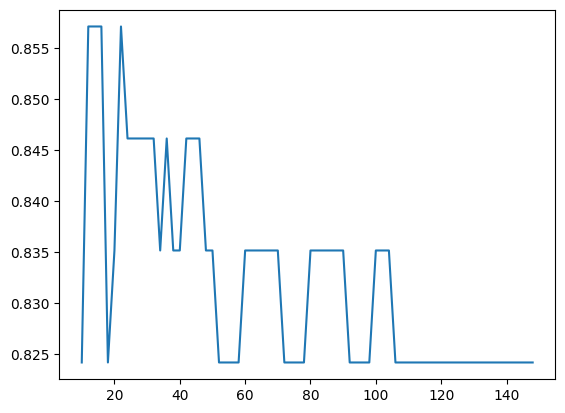

In [401]:
from sklearn.ensemble import RandomForestClassifier

x = np.arange(10,150,2)
a = []
for i in x:
    rf = RandomForestClassifier(n_estimators = i, random_state =42)
    rf.fit(X_train,np.ravel(y_train))
    y_pred3 = rf.predict(X_test)
    print('Accuracy: {0:0.5f}\nEstimator: {1}'. format(metrics.accuracy_score(y_test, y_pred3), i))
    a.append(metrics.accuracy_score(y_test, y_pred3))
plt.plot(x,a)

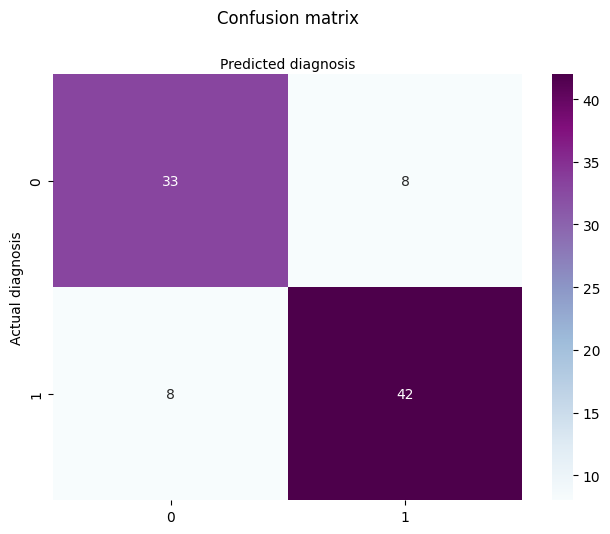

In [402]:
conf_matrix(y_test, y_pred3)

In [403]:
feature_score = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_score

ca          0.129367
cp          0.122060
oldpeak     0.109958
thalach     0.109035
thal        0.105743
age         0.090260
exang       0.076964
chol        0.069600
trestbps    0.068682
slope       0.054114
sex         0.033724
restecg     0.016429
fbs         0.014066
dtype: float64

In [404]:
import torch
from torch import nn

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, X_test, y_train, y_test = train_test_split(allData,target_data,test_size = 0.30, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns = allData.columns[0:13])
X_test_scaled = pd.DataFrame(X_test_scaled,columns = allData.columns[0:13])

X_train_scaled.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

new_columns = allData.columns.tolist()
new_columns.append('target')
new_train_data = pd.concat([X_train_scaled, y_train], axis=1, ignore_index=True).set_axis(labels=new_columns,axis=1)
new_test_data = pd.concat([X_test_scaled, y_test], axis=1, ignore_index=True).set_axis(labels=new_columns,axis=1)
display(new_train_data)
display(new_test_data)

type(new_train_data)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-1.673396,-1.394433,0.952809,-2.147870,-0.886805,-0.382029,0.870139,1.271190,-0.687184,-0.931190,0.955317,-0.676291,-0.548882,1
1,-2.763624,0.717137,-0.013677,-0.027779,-0.795025,-0.382029,-1.031608,2.284485,-0.687184,-0.931190,0.955317,-0.676291,-0.548882,1
2,-0.474146,-1.394433,0.952809,-0.616693,-0.519684,-0.382029,0.870139,0.346008,-0.687184,0.537925,-0.677967,-0.676291,-0.548882,1
3,-0.038055,0.717137,-0.980163,0.561135,-0.152563,-0.382029,0.870139,0.434121,-0.687184,0.170646,0.955317,-0.676291,-0.548882,1
4,-1.782419,0.717137,0.952809,0.443352,-1.327350,-0.382029,0.870139,1.006853,-0.687184,-0.931190,0.955317,3.540580,-0.548882,1
5,0.398036,-1.394433,-0.980163,-0.027779,-0.923517,-0.382029,0.870139,-0.843512,-0.687184,-0.380272,-0.677967,-0.676291,-0.548882,1
6,-0.256101,0.717137,-0.980163,-1.323390,-0.262699,2.617604,0.870139,-0.138611,-0.687184,-0.839370,0.955317,2.486362,1.137539,1
7,-1.128283,0.717137,-0.013677,-0.616693,-0.501328,-0.382029,0.870139,0.874684,-0.687184,-0.931190,0.955317,-0.676291,-0.548882,1
8,1.052172,0.717137,0.952809,-0.322236,1.132361,-0.382029,0.870139,-0.843512,1.455214,0.721564,-0.677967,-0.676291,1.137539,0
9,-0.038055,0.717137,0.952809,1.150049,-0.281055,-0.382029,-1.031608,0.654402,-0.687184,0.537925,0.955317,-0.676291,1.137539,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.289013,0.717137,-0.980163,1.150049,0.526611,-0.382029,-1.031608,-1.680581,1.455214,-0.380272,-0.677967,0.377927,-2.235304,0
1,0.507059,0.717137,1.919296,2.327878,0.746884,-0.382029,-1.031608,0.390064,-0.687184,-0.747550,-0.677967,-0.676291,1.137539,0
2,0.289013,0.717137,0.952809,1.150049,-2.226797,2.617604,0.870139,1.006853,-0.687184,-0.747550,0.955317,0.377927,1.137539,1
3,0.179990,-1.394433,-0.980163,0.207787,2.967966,-0.382029,-1.031608,-0.006442,1.455214,0.813383,-0.677967,1.432145,1.137539,0
4,1.815332,-1.394433,0.952809,-1.205607,0.324694,2.617604,-1.031608,-0.887568,-0.687184,-0.931190,0.955317,0.377927,-0.548882,1
5,0.289013,0.717137,0.952809,1.150049,-1.455843,-0.382029,0.870139,1.050909,-0.687184,0.537925,0.955317,-0.676291,-0.548882,1
6,-0.910237,-1.394433,-0.980163,0.443352,-0.079139,-0.382029,-1.031608,0.081670,1.455214,-0.931190,-0.677967,-0.676291,-0.548882,1
7,0.179990,-1.394433,-0.980163,4.094620,0.746884,2.617604,-1.031608,-0.755399,1.455214,2.741596,-2.311251,1.432145,1.137539,0
8,-0.038055,0.717137,-0.980163,-0.498910,0.710171,-0.382029,-1.031608,-1.504356,1.455214,2.007039,-0.677967,1.432145,-0.548882,0
9,-0.038055,0.717137,0.952809,-0.322236,0.471543,-0.382029,-1.031608,0.081670,-0.687184,-0.472092,-2.311251,0.377927,-0.548882,1


pandas.core.frame.DataFrame

In [405]:
X_train_scaled_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_scaled_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_scaled_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_scaled_tensor, y_test_tensor)

X_train_scaled_tensor = tf.constant(X_train_scaled.values, dtype = tf.float32)
X_test_scaled_tensor = tf.constant(X_test_scaled.values, dtype = tf.float32)
y_test_tensor = tf.constant(y_test.values, dtype = tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype = tf.float32)       


"""y_test_tensor = tf.convert_to_tensor(y_test_tensor, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train_tensor, dtype=tf.float32)
X_train_scaled_tensor = tf.convert_to_tensor(X_train_scaled_tensor, dtype=tf.float32)
X_test_scaled_tensor = tf.convert_to_tensor(X_test_scaled_tensor, dtype=tf.float32)"""
print(type(X_train_scaled_tensor))
print(tf.shape(X_test_scaled_tensor))

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=10, shuffle=True)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([91 13], shape=(2,), dtype=int32)


In [406]:
"""X_train = X_train.drop(['ca', 'cp', 'oldpeak', 'thal'], axis=1)
X_test = X_test.drop(['ca', 'cp', 'oldpeak', 'thal'], axis=1)
"""
X_train_t = torch.from_numpy(X_train_scaled.values).type(torch.float)
X_test_t = torch.from_numpy(X_test_scaled.values).type(torch.float)
y_train_t = torch.from_numpy(y_train.values).type(torch.float)
y_test_t = torch.from_numpy(y_test.values).type(torch.float)

"""print(type(new_train_data))
new_train_data = torch.tensor(new_train_data.values)
new_test_data = torch.tensor(new_test_data.values)
print(type(new_train_data))
display(new_train_data)"""


"""for data, labels in train_loader:
    print(data)
    print(labels)"""

for data,labels in train_loader:
    print(data)
    print(labels.squeeze())

tensor([[ 0.1800,  0.7171,  1.9193, -0.6167, -0.9969, -0.3820, -1.0316,  0.5222,
         -0.6872,  0.8134, -0.6780, -0.6763,  1.1375],
        [-0.6922,  0.7171, -0.0137, -0.0278, -0.0424, -0.3820, -1.0316,  1.3152,
         -0.6872, -0.7476, -0.6780, -0.6763, -0.5489],
        [-1.4554,  0.7171, -0.0137, -1.2056, -0.2260, -0.3820,  0.8701,  0.1257,
         -0.6872, -0.9312,  0.9553, -0.6763, -0.5489],
        [ 0.5071,  0.7171,  0.9528,  1.1500, -0.6482,  2.6176,  0.8701,  0.3020,
         -0.6872,  0.5379,  0.9553, -0.6763, -0.5489],
        [ 0.1800,  0.7171, -0.0137, -0.0278, -0.4830, -0.3820, -1.0316,  0.5663,
         -0.6872, -0.9312,  0.9553, -0.6763,  1.1375],
        [-1.2373,  0.7171, -0.9802, -0.9112,  1.0222, -0.3820,  0.8701,  1.3593,
         -0.6872,  0.1706, -0.6780, -0.6763, -0.5489],
        [ 1.4883,  0.7171,  0.9528,  2.9168,  0.4899,  2.6176, -1.0316, -0.0064,
          1.4552,  0.5379, -0.6780, -0.6763,  1.1375],
        [ 0.3980, -1.3944, -0.9802, -0.0278, -0.

In [407]:
"""def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

torch.manual_seed(42)

test_accr = []
train_accr = []

test_loss_val = []
train_loss_val = []
class Model0(nn.Module):
    def __init__(self):
        super(Model0, self).__init__()
        self.layer_1 = nn.Linear(in_features=13, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout2 = nn.Dropout(0.1)
        self.dropout1 = nn.Dropout(0.1)
            
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.dropout1(x)
        x = self.relu(self.layer_2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.layer_3(x))
        return x

        
model_0 = Model0().to(device)
"""
"""class ClassificationModel(torch.nn.Module):

    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN):
        super(ClassificationModel, self).__init__()

        self.linear1 = torch.nn.Linear(NUM_FEATURES, HIDDEN)
        #self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(HIDDEN, NUM_CLASSES)
        self.log_softmax= nn.LogSoftmax(dim = 1) #nn.Softmax(dim = 1)#
        #self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = torch.tanh(x)
        x = self.linear2(x)
        #x = self.softmax(x)
        x = self.log_softmax(x)
        return x"""
"""
#mymodel= ClassificationModel(NUM_FEATURES = 13, NUM_CLASSES = 2, HIDDEN = 10)
loss_f = nn.BCELoss()
optimizer = torch.optim.Adam(params= model_0.parameters(), lr=0.001)      
        
epochs = np.arange(1, 301,1)
        
X_train_t, y_train_t = X_train_t.to(device), y_train_t.to(device)
X_test_t, y_test_t = X_test_t.to(device), y_test_t.to(device)
X_test_scaled_tensor, y_test_tensor = X_test_scaled_tensor.to(device), y_test_tensor.to(device)


w = []
#history = model_0.fit(X_train_t, y_train_t, validation_data=(X_test_t, y_test_t), epochs=300, batch_size=10)

for epoch in epochs:
    model_0.train()
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        #X_batch = X_train_t[start:start+30]
        #y_batch = y_train_t[start:start+30]
        y_train_p= model_0(data)
        y_train_pred = torch.round(y_train_p)
        
        loss = loss_f(y_train_p, labels)
        #print(y_train_pred)
        #print(labels.squeeze())
        acc =  accuracy_fn(y_true=labels, y_pred=y_train_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}%")
        
    model_0.eval()  
    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            X_test_sq = model_0(data)
            X_test_sq_pred = torch.round(X_test_sq)
            test_loss = loss_f(X_test_sq,labels)
            test_loss_val.append(test_loss)
            test_acc = accuracy_fn(y_true=labels,
                                               y_pred=X_test_sq_pred)
            test_accr.append(test_acc)
            w.append(test_acc)
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

"""

"""
for epoch in epochs:
    optimizer.zero_grad()
    #model_0.train()
    y_train_sq = model_0(X_train_t)
    y_pred = torch.round(y_train_sq)
                    
    loss = loss_f(y_train_sq, y_train_t)
                        
    acc =  accuracy_fn(y_true=y_train_t, y_pred=y_pred) 
    train_accr.append(acc)
    
    loss.backward()
    train_loss_val.append(loss.detach().numpy())
    optimizer.step()
    model_0.eval()
    with torch.no_grad():
            # 1. Forward pass
            X_test_sq = model_0(X_test_t)
            X_test_sq_pred = torch.round(torch.sigmoid(X_test_sq))
            # 2. Caculate loss/accuracy
            test_loss = loss_f(X_test_sq,
                                        y_test_t)
            test_loss_val.append(test_loss)
            test_acc = accuracy_fn(y_true=y_test_t,
                                           y_pred=X_test_sq_pred)
            test_accr.append(test_acc)
            w.append(test_acc)
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



print("*******************************")
print(f"Overall Accuracy: {max(test_accr)}")
"""


'\nfor epoch in epochs:\n    optimizer.zero_grad()\n    #model_0.train()\n    y_train_sq = model_0(X_train_t)\n    y_pred = torch.round(y_train_sq)\n                    \n    loss = loss_f(y_train_sq, y_train_t)\n                        \n    acc =  accuracy_fn(y_true=y_train_t, y_pred=y_pred) \n    train_accr.append(acc)\n    \n    loss.backward()\n    train_loss_val.append(loss.detach().numpy())\n    optimizer.step()\n    model_0.eval()\n    with torch.no_grad():\n            # 1. Forward pass\n            X_test_sq = model_0(X_test_t)\n            X_test_sq_pred = torch.round(torch.sigmoid(X_test_sq))\n            # 2. Caculate loss/accuracy\n            test_loss = loss_f(X_test_sq,\n                                        y_test_t)\n            test_loss_val.append(test_loss)\n            test_acc = accuracy_fn(y_true=y_test_t,\n                                           y_pred=X_test_sq_pred)\n            test_accr.append(test_acc)\n            w.append(test_acc)\n            if 

In [408]:
"""plt.figure(figsize=(8, 6))
x = np.arange(0,3000,1)

plt.plot(x, test_accr, 'b', label=f'Test Accuracy')
plt.plot(x,train_accr, 'g', label=f'Train Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.grid(True)
plt.show() """

"plt.figure(figsize=(8, 6))\nx = np.arange(0,3000,1)\n\nplt.plot(x, test_accr, 'b', label=f'Test Accuracy')\nplt.plot(x,train_accr, 'g', label=f'Train Accuracy')\n\nplt.xlabel('Epoch')\nplt.ylabel('Accuracy')\n\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show() "

In [409]:
"""plt.figure(figsize=(8, 6))
plt.plot(x, test_loss_val, 'r', label=f'Test Loss')
plt.plot(x, train_loss_val, 'b', label=f'Train Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='lower right')
plt.grid(True)
plt.show() """

"plt.figure(figsize=(8, 6))\nplt.plot(x, test_loss_val, 'r', label=f'Test Loss')\nplt.plot(x, train_loss_val, 'b', label=f'Train Loss')\n\nplt.xlabel('Epoch')\nplt.ylabel('Loss')\n\nplt.legend(loc='lower right')\nplt.grid(True)\nplt.show() "

In [410]:
 """model_0.train()
        y_train_sq = model_0(X_train_t)
        y_pred = torch.round(torch.sigmoid(y_train_sq))
                
        loss = loss_f(y_train_sq,
                                  y_train_t)
            
        acc =  accuracy_fn(y_true=y_train_t, 
                                      y_pred=y_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    model_0.eval()
    
    
    for epoch in epochs:
    for X_batch , y_batch in train_loader:
    #X_batch = X_train_t[start:start+30]
    #y_batch = y_train_t[start:start+30]
        model_0.train()
        y_train_sq = model_0(X_train_t)
        y_pred = torch.round(torch.sigmoid(y_train_sq))
                
        loss = loss_f(y_train_sq,
                                  y_train_t)
            
        acc =  accuracy_fn(y_true=y_train_t, 
                                      y_pred=y_pred) 
        train_accr.append(acc)
        optimizer.zero_grad()
        loss.backward()
        train_loss_val.append(loss.detach().numpy())
        optimizer.step()
    model_0.eval()
    
    """


'model_0.train()\n       y_train_sq = model_0(X_train_t)\n       y_pred = torch.round(torch.sigmoid(y_train_sq))\n               \n       loss = loss_f(y_train_sq,\n                                 y_train_t)\n           \n       acc =  accuracy_fn(y_true=y_train_t, \n                                     y_pred=y_pred) \n       train_accr.append(acc)\n       optimizer.zero_grad()\n       loss.backward()\n       train_loss_val.append(loss.detach().numpy())\n       optimizer.step()\n   model_0.eval()\n   \n   \n   for epoch in epochs:\n   for X_batch , y_batch in train_loader:\n   #X_batch = X_train_t[start:start+30]\n   #y_batch = y_train_t[start:start+30]\n       model_0.train()\n       y_train_sq = model_0(X_train_t)\n       y_pred = torch.round(torch.sigmoid(y_train_sq))\n               \n       loss = loss_f(y_train_sq,\n                                 y_train_t)\n           \n       acc =  accuracy_fn(y_true=y_train_t, \n                                     y_pred=y_pred) \n      

In [411]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout

model_2= tf.keras.Sequential ([
    layers.Dense(8, input_shape = (13,) , activation = 'relu', kernel_initializer = 'normal', name = 'layer1'),
    Dropout(0.5),
    layers.Dense(4, activation = 'relu', kernel_initializer = 'normal', name = 'layer2'),
    Dropout(0.25),
    layers.Dense(2, activation = 'relu', kernel_initializer = 'normal', name = 'layer3'),
    layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'normal', name = 'layer4'),])



C:\Users\onlinekullanici\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [412]:
checkpoint_dir = "training_1"
checkpoint_file = "cp.weights.h5"
path_checkpoint = os.path.join(checkpoint_dir, checkpoint_file)
directory_checkpoint = os.path.dirname(path_checkpoint)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

tf.random.set_seed(42)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                               save_weights_only=True,
                                               verbose=1)


model_2.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = keras.optimizers.Adam(learning_rate=0.0002),
    metrics = ['accuracy'] 
)
#X_train_scaled_tensor.shape,y_train_tensor.shape



history = model_2.fit(X_train_scaled_tensor, y_train_tensor, batch_size=16, epochs=450, validation_data=(X_test_scaled_tensor, y_test_tensor))

Epoch 1/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4636 - loss: 0.6931 - val_accuracy: 0.5495 - val_loss: 0.6931
Epoch 2/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6931 - val_accuracy: 0.5495 - val_loss: 0.6930
Epoch 3/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6930 - val_accuracy: 0.5495 - val_loss: 0.6929
Epoch 4/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6929 - val_accuracy: 0.5495 - val_loss: 0.6928
Epoch 5/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6929 - val_accuracy: 0.5495 - val_loss: 0.6928
Epoch 6/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6928 - val_accuracy: 0.5495 - val_loss: 0.6927
Epoch 7/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6927 - val_accuracy: 0.5495 - val_loss: 0.6926
Epoch 8/450
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6927 - val_accuracy: 0.5495 - 

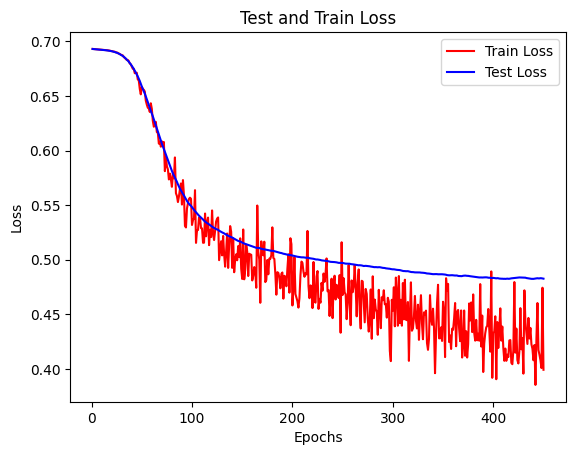

In [413]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Test Loss')
plt.title('Test and Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

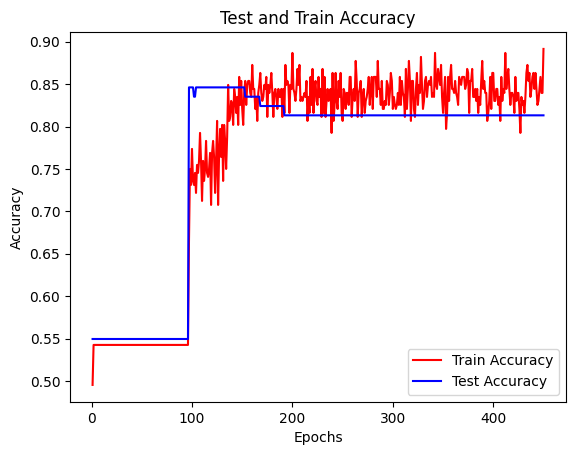

In [414]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Test Accuracy')
plt.title('Test and Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [415]:
print(path_checkpoint)


training_1\cp.weights.h5


In [416]:
ls {directory_checkpoint}

 Volume in drive C has no label.
 Volume Serial Number is DA15-A027

 Directory of C:\Users\onlinekullanici\Desktop\jupyters\training_1

05.03.2024  17:16    <DIR>          .
05.03.2024  17:16    <DIR>          ..
               0 File(s)              0 bytes
               2 Dir(s)  248.817.864.704 bytes free


In [417]:
model_2.save('ANN_model_2.h5')
model_2.save_weights('ANN_model_2.weights.h5')
 

In [418]:
model_2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer3 (Dense)                       │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer4 (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

In [419]:
from tensorflow.python import keras
print(tf.__version__)

2.16.0-rc0


In [420]:
import keras
print(keras.__version__)

3.0.5
